# Describe merged sequences file

Download the `merged_results` folder as described by `README.md` in this project 
root folder. Then we can apply some statistics to the merged sequences file.

In [1]:
import csv

import Bio.SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import project_directory

let's read the sequences file:

In [2]:
fasta_file = project_directory / "merged_results/export/rep-seqs.fasta/dna-sequences.fasta"

sequences = Bio.SeqIO.index(fasta_file, "fasta")

How many sequences are in the file?

In [3]:
len(sequences)

122988

Let's measure the length of each sequence and plot a histogram of the lengths:

In [4]:
# get the lengths of all sequences
sequence_lengths = [len(record.seq) for record in sequences.values()]

Let's search for outliers in the lengths of the sequences, for example sequences
with lengths 1.5 far from IQR:

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(sequence_lengths, 25)
Q3 = np.percentile(sequence_lengths, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = [length for length in sequence_lengths if length < lower_bound or length > upper_bound]

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Lower bound for outliers: 374.5
Upper bound for outliers: 450.5


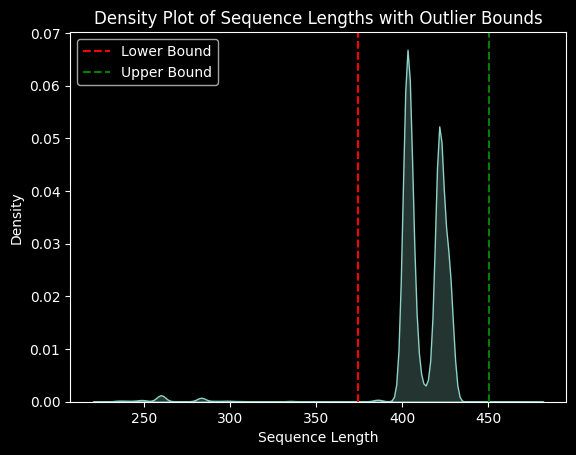

In [6]:
# Create a density plot
sns.kdeplot(sequence_lengths, fill=True)
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.xlabel('Sequence Length')
plt.ylabel('Density')
plt.title('Density Plot of Sequence Lengths with Outlier Bounds')
plt.legend()
plt.show()

In [7]:
num_below_lower_bound = sum(length < lower_bound for length in sequence_lengths)
print(f"Number of sequences with lengths below the lower bound: {num_below_lower_bound}")

Number of sequences with lengths below the lower bound: 3543


try to load the taxononies from file

In [8]:
taxonomy_file = project_directory / "merged_results/export/taxonomy/taxonomy.tsv"

with open(taxonomy_file, 'r') as handle:
    reader = csv.DictReader(handle, delimiter='\t')
    taxonomies = [row for row in reader]

taxonomies = {row['Feature ID']: row["Taxon"] for row in taxonomies}

Ok try to collect the taxonomy for sequences with lengths below `lower_bound`:

In [9]:
short_sequences = {record.id: taxonomies[record.id].split(";")[:-1] for record in sequences.values() if len(record.seq) < lower_bound}

In [10]:
# Convert the short_sequences dictionary into a DataFrame
short_sequences_df = pd.DataFrame.from_dict(short_sequences, orient='index', columns=['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Strain'])

# Display the DataFrame
short_sequences_df.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Strain
002774e1a6f591311f22303081650d9b,Bacteria,Firmicutes,Clostridia,Oscillospirales,Hungateiclostridiaceae,Saccharofermentans,,
0028e5a85cbacf0a9af27c47e03f663c,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Fournierella,,
002ea70f8c40988bf80ca7e710e137cb,Bacteria,Firmicutes,Bacilli,Mycoplasmatales,Mycoplasmataceae,Mycoplasma,girerdii,
0043b08cafc772cfeae128189c7ad8c3,Bacteria,,,,,,,
0065c57cd7812a1163fd624b2f2a2b15,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,,,,


In [11]:
# Add a column for sequence length
short_sequences_df['Sequence Length'] = [len(sequences[seq_id].seq) for seq_id in short_sequences_df.index]

# Display the updated DataFrame
short_sequences_df.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Strain,Sequence Length
002774e1a6f591311f22303081650d9b,Bacteria,Firmicutes,Clostridia,Oscillospirales,Hungateiclostridiaceae,Saccharofermentans,,,260
0028e5a85cbacf0a9af27c47e03f663c,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Fournierella,,,283
002ea70f8c40988bf80ca7e710e137cb,Bacteria,Firmicutes,Bacilli,Mycoplasmatales,Mycoplasmataceae,Mycoplasma,girerdii,,259
0043b08cafc772cfeae128189c7ad8c3,Bacteria,,,,,,,,270
0065c57cd7812a1163fd624b2f2a2b15,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,,,,,259


In [12]:
# Replace empty values with 'unknown'
short_sequences_df = short_sequences_df.replace('', 'Unknown')

# Display the updated DataFrame
short_sequences_df.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Strain,Sequence Length
002774e1a6f591311f22303081650d9b,Bacteria,Firmicutes,Clostridia,Oscillospirales,Hungateiclostridiaceae,Saccharofermentans,Unknown,Unknown,260
0028e5a85cbacf0a9af27c47e03f663c,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Fournierella,Unknown,Unknown,283
002ea70f8c40988bf80ca7e710e137cb,Bacteria,Firmicutes,Bacilli,Mycoplasmatales,Mycoplasmataceae,Mycoplasma,girerdii,Unknown,259
0043b08cafc772cfeae128189c7ad8c3,Bacteria,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,270
0065c57cd7812a1163fd624b2f2a2b15,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Unknown,Unknown,Unknown,Unknown,259


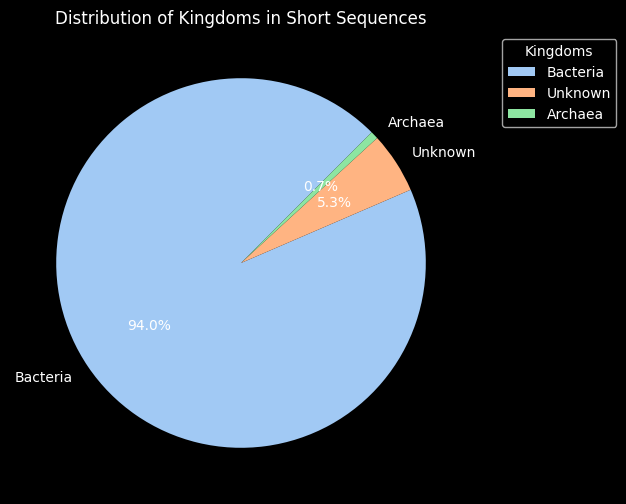

In [13]:
# Count the occurrences of each kingdom
kingdom_counts = short_sequences_df['Kingdom'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
kingdom_counts.plot.pie(autopct='%1.1f%%', startangle=45, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Distribution of Kingdoms in Short Sequences')

# Add a legend
plt.legend(kingdom_counts.index, title="Kingdoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


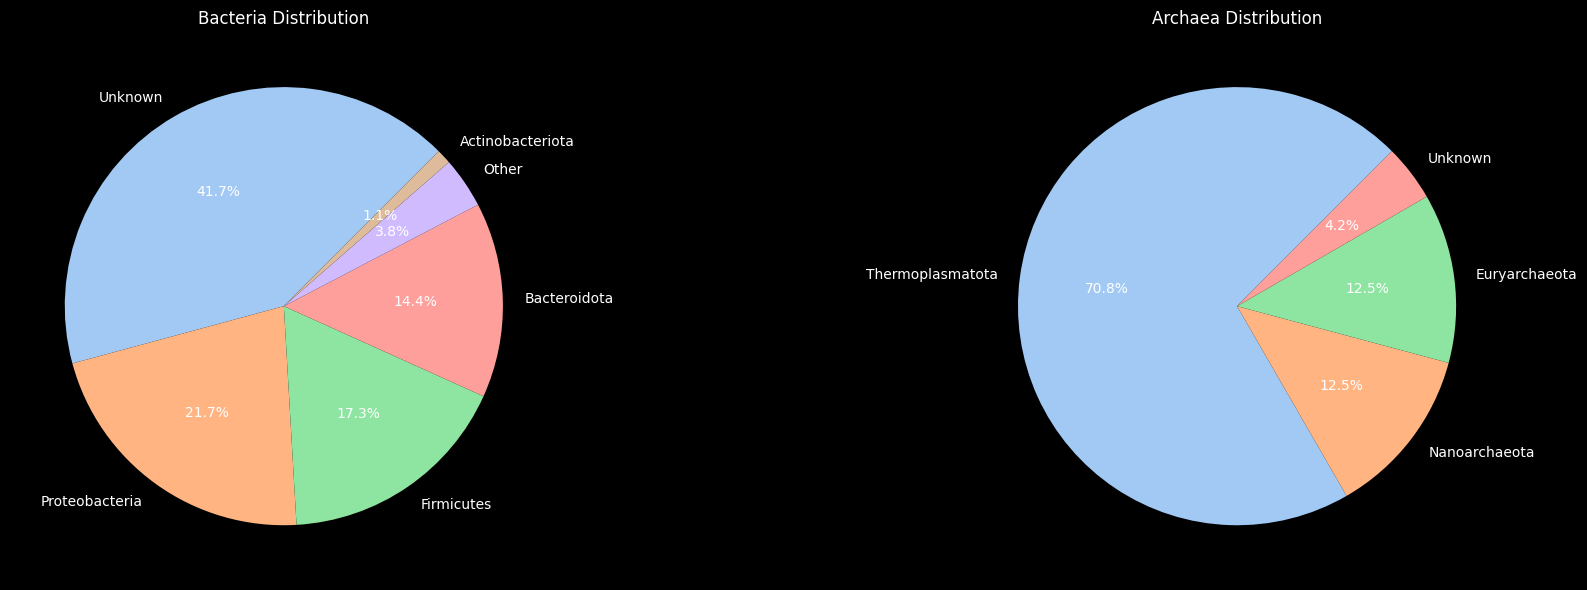

In [14]:
# Count the occurrences of each kingdom
kingdom_counts = short_sequences_df['Kingdom'].value_counts()

# drop the 'Unknown' kingdom
kingdom_counts = kingdom_counts.drop('Unknown')

# Condense values below a certain threshold
threshold = 30

def condense_values(counts, threshold):
    # return if there are a few elements
    if len(counts) <= 5:
        return counts
    
    # Condense values below a certain threshold
    counts = counts.to_dict()
    other_count = sum(v for v in counts.values() if v <= threshold)
    counts = {k: v for k, v in counts.items() if v > threshold}
    counts['Other'] = other_count
    return pd.Series(counts).sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(kingdom_counts), figsize=(20, 6))

# Plot each kingdom in a separate subplot
for ax, (kingdom, count) in zip(axes, kingdom_counts.items()):
    kingdom_data = short_sequences_df[short_sequences_df['Kingdom'] == kingdom]
    phylum_counts = kingdom_data['Phylum'].value_counts()
    phylum_counts = condense_values(phylum_counts, threshold)
    phylum_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=45, colors=sns.color_palette('pastel'))
    ax.set_ylabel('')
    ax.set_title(f'{kingdom} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()